Importo las librerias a usar y declaro las funciones para:
- Cargar el archivo de heaps
- Calcular la estimación de heaps
- Graficar las predicciones junto a la cantidad de términos únicos real

In [1]:
%matplotlib inline
import csv
from array import array
import matplotlib.pyplot as plt

def cargar_heaps_csv(path_heaps):
    with open(path_heaps, mode="rb") as file_csv:
        lista_unicos = []
        csv_reader = csv.reader(file_csv, delimiter=",")
        for fila in csv_reader:
            lista_unicos.append(fila[0])
    return lista_unicos


def calcular_estimacion_heaps(terminos_procesados, param_k, param_b):
    terminos_unicos = []
    for cantidad_procesada in terminos_procesados:
        terminos_unicos.append(param_k * pow(cantidad_procesada, param_b))
    return terminos_unicos


def graficar_predicciones_heaps(lista_predicciones, terminos_procesados, terminos_unicos, colores):
    figura, grafico = plt.subplots()
    for indice, prediccion in enumerate(lista_predicciones):
        grafico.plot(terminos_procesados, prediccion[2], color=colores[indice], linewidth=1, linestyle="--",
                     label="k: "+str(prediccion[0])+" | b: "+str(prediccion[1]))
    grafico.plot(terminos_procesados, terminos_unicos, color="b", linewidth=1, label="Real")
    grafico.legend(loc="upper left")
    grafico.grid(True)
    grafico.set_xlabel(u"Cantidad de términos encontrados")
    grafico.set_ylabel(u"Cantidad de términos únicos")
    figura.show()

Cargo la lista de términos únicos por cada término encontrado y la grafico junto a distintas estimaciones de la ley de Heaps usando distintos parámetros.

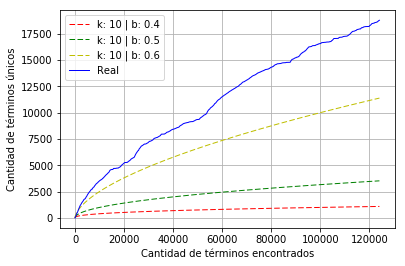

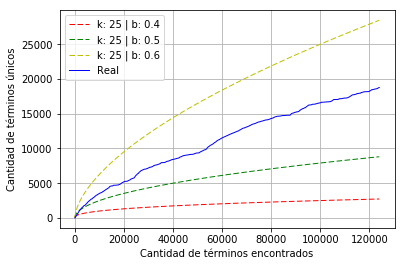

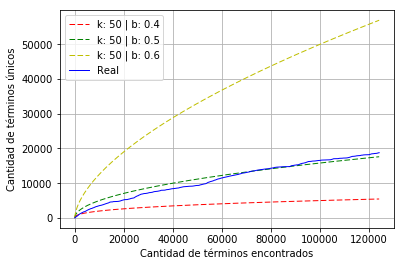

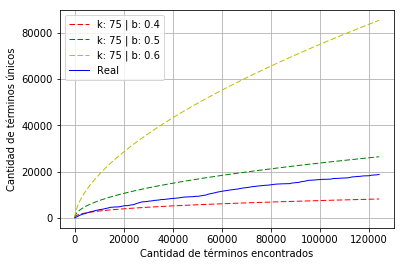

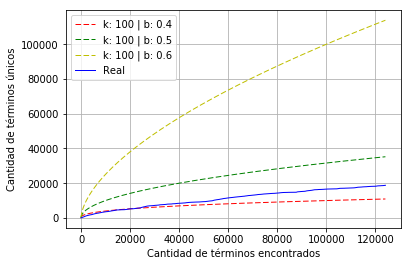

In [3]:
terminos_unicos_mitad = cargar_heaps_csv("ri-short/heaps.csv")
terminos_encontrados = range(1, len(terminos_unicos_mitad) + 1)
params_k = [10, 25, 50, 75, 100]
params_b = [0.4, 0.5, 0.6]
colores = ["r", "g", "y"]

for param_k in params_k:
    lista_predicciones_heaps = []
    for param_b in params_b:
        lista_predicciones_heaps.append([param_k, param_b, calcular_estimacion_heaps(terminos_encontrados, param_k, param_b)])
    graficar_predicciones_heaps(lista_predicciones_heaps, terminos_encontrados, terminos_unicos_mitad, colores)

Se puede ver que la estimación mas cercana a la cantidad real de términos únicos es la que tiene los parámetros:
- k = 50
- b = 0.5

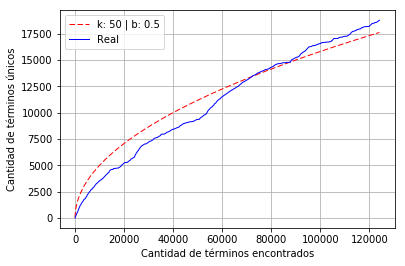

In [4]:
prediccion_heaps = [([50, 0.5, calcular_estimacion_heaps(terminos_encontrados, 50, 0.5)])]
graficar_predicciones_heaps(prediccion_heaps, terminos_encontrados, terminos_unicos_mitad, colores)

Ahora cargo la lista de términos únicos obtenida de la indexación del corpus completo.

In [5]:
terminos_unicos_completo = cargar_heaps_csv("ri-index/heaps.csv")
terminos_encontrados_completo = range(1, len(terminos_unicos_completo) + 1)

Comparo la nueva lista con la estimación de heaps que usa los parámetros seleccionados previamente.

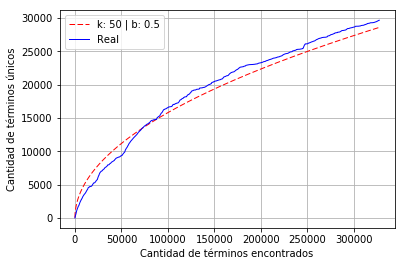

In [6]:
prediccion_heaps = [([50, 0.5, calcular_estimacion_heaps(terminos_encontrados_completo, 50, 0.5)])]
graficar_predicciones_heaps(prediccion_heaps, terminos_encontrados_completo, terminos_unicos_completo, colores)

Como podemos ver, el crecimiento resulta ser bastante similar al estimado por la ley de Heaps.